# Income Inequality Analysis
Exploring World Bank data on income distribution and inequality metrics

## 1. Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

## 2. Load and Prepare Data

In [5]:
df = pd.read_csv('input/raw/WDICSV.csv')
df.sample(100).to_csv('input/raw/sample.csv', index=False)

## 3. Explore Available Indicators
- Moved to lookup notebook

In [6]:
# code_name = df['Indicator Code'] + ' - ' + df['Indicator Name']

# for cn in code_name.unique():
#     print(cn)
    
# print(f"# of features: {len(code_name.unique())}")

## 4. Extract Income Distribution Data

In [7]:
df_top10_income_share = df[df['Indicator Code'] == 'SI.DST.10TH.10']
df_bottom10_income_share = df[df['Indicator Code'] == 'SI.DST.FRST.10']
years = df_top10_income_share.columns[4:]

## 5. Visualize Income Share Trends

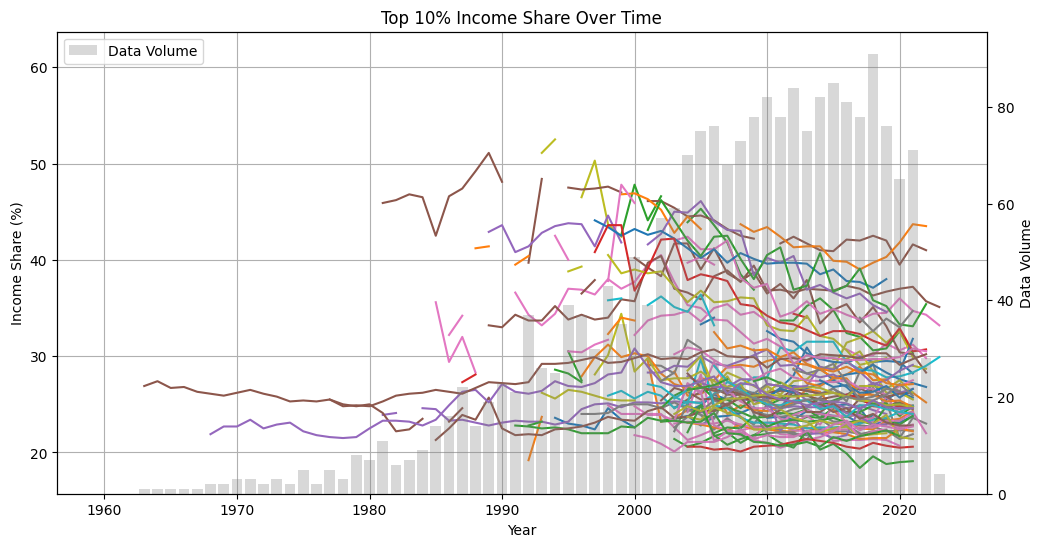

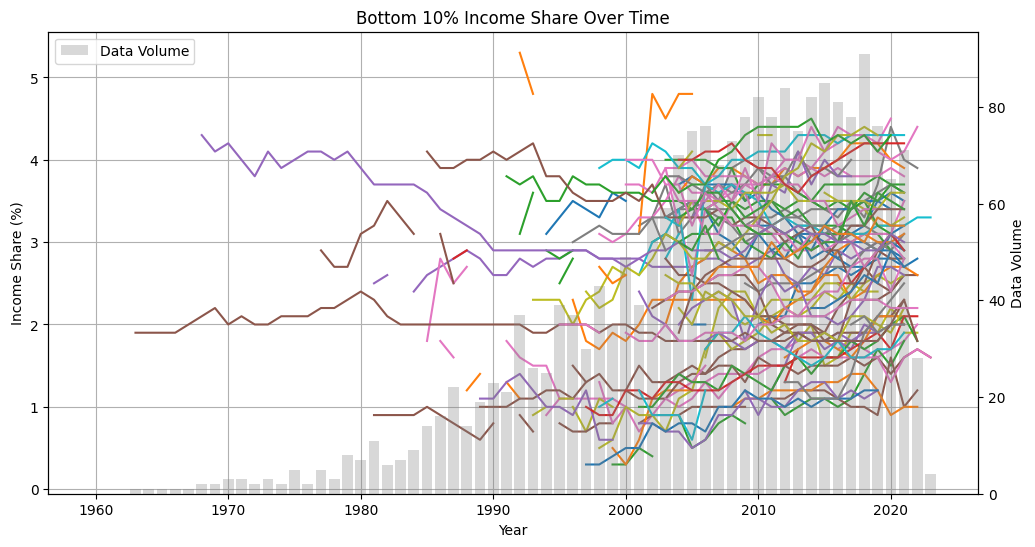

In [8]:
# Plot the line chart for top 10% income share
fig1, ax1 = plt.subplots(figsize=(12, 6))
df_top10_income_share.set_index('Country Code')[years].T.plot(
    title='Top 10% Income Share Over Time',
    xlabel='Year',
    ylabel='Income Share (%)',
    legend=False,
    grid=True,
    ax=ax1
)

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()
data_volume = df_top10_income_share[years].count()
ax2.bar(years, data_volume, alpha=0.3, color='gray', label='Data Volume')
ax2.set_ylabel('Data Volume')
ax2.legend(loc='upper left')

plt.show()

# Plot the line chart for bottom 10% income share
fig2, ax3 = plt.subplots(figsize=(12, 6))
df_bottom10_income_share.set_index('Country Code')[years].T.plot(
    title='Bottom 10% Income Share Over Time',
    xlabel='Year',
    ylabel='Income Share (%)',
    legend=False,
    grid=True,
    ax=ax3
)

# Create a secondary y-axis for the histogram
ax4 = ax3.twinx()
data_volume = df_bottom10_income_share[years].count()
ax4.bar(years, data_volume, alpha=0.3, color='gray', label='Data Volume')
ax4.set_ylabel('Data Volume')
ax4.legend(loc='upper left')

plt.show()


## 6. Calculate and Visualize Mean Income Share

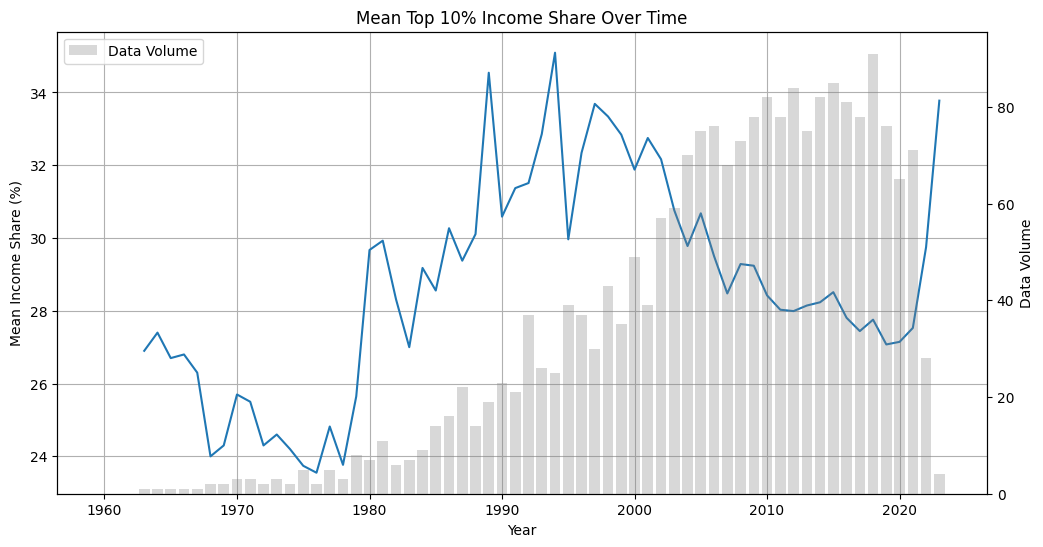

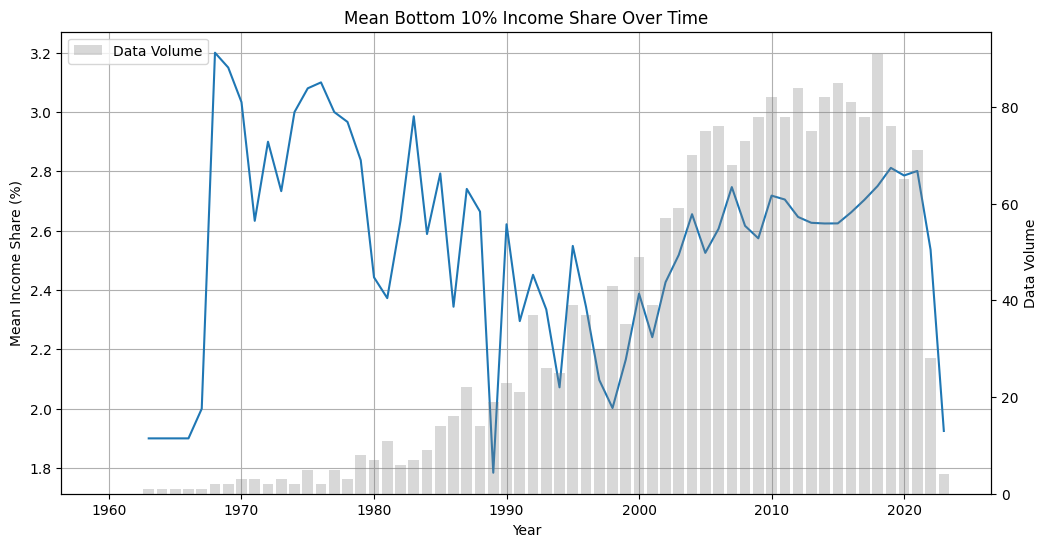

In [9]:
# Calculate the mean over time for top 10% income share
mean_top10 = df_top10_income_share[years].mean()

# Plot the mean over time for top 10% income share
fig1, ax1 = plt.subplots(figsize=(12, 6))
mean_top10.plot(
    title='Mean Top 10% Income Share Over Time',
    xlabel='Year',
    ylabel='Mean Income Share (%)',
    grid=True,
    ax=ax1
)

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()
data_volume_top10 = df_top10_income_share[years].count()
ax2.bar(years, data_volume_top10, alpha=0.3, color='gray', label='Data Volume')
ax2.set_ylabel('Data Volume')
ax2.legend(loc='upper left')

plt.show()

# Calculate the mean over time for bottom 10% income share
mean_bottom10 = df_bottom10_income_share[years].mean()

# Plot the mean over time for bottom 10% income share
fig2, ax3 = plt.subplots(figsize=(12, 6))
mean_bottom10.plot(
    title='Mean Bottom 10% Income Share Over Time',
    xlabel='Year',
    ylabel='Mean Income Share (%)',
    grid=True,
    ax=ax3
)

# Create a secondary y-axis for the histogram
ax4 = ax3.twinx()
data_volume_bottom10 = df_bottom10_income_share[years].count()
ax4.bar(years, data_volume_bottom10, alpha=0.3, color='gray', label='Data Volume')
ax4.set_ylabel('Data Volume')
ax4.legend(loc='upper left')

plt.show()


## 7. Data Transformation for Analysis

In [10]:
df_long = df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                  var_name="Year", value_name="Value")

df_wide = df_long.pivot_table(index=["Country Name", "Country Code", "Year"],
                              columns="Indicator Code", values="Value")

df_wide = df_wide.reset_index()

df_wide

Indicator Code Country Name Country Code  Year  AG.CON.FERT.PT.ZS  \
0               Afghanistan          AFG  1960                NaN   
1               Afghanistan          AFG  1961                NaN   
2               Afghanistan          AFG  1962                NaN   
3               Afghanistan          AFG  1963                NaN   
4               Afghanistan          AFG  1964                NaN   
...                     ...          ...   ...                ...   
16955              Zimbabwe          ZWE  2019         623.474178   
16956              Zimbabwe          ZWE  2020         212.474438   
16957              Zimbabwe          ZWE  2021         212.474438   
16958              Zimbabwe          ZWE  2022         212.474438   
16959              Zimbabwe          ZWE  2023                NaN   

Indicator Code  AG.CON.FERT.ZS  AG.LND.AGRI.K2  AG.LND.AGRI.ZS  \
0                          NaN             NaN             NaN   
1                     0.143791        377500.0       57.878356   
2                     0.142857        378000.0       57.955016   
3                     0.141935        378500.0       58.031676   
4                     0.141026        379050.0       58.116002   
...                        ...             ...             ...   
16955                42.386111        162000.0       39.518358   
16956                32.278234        162000.0       39.754073   
16957                33.771180        162000.0       39.385906   
16958                33.330587             NaN       39.489284   
16959                      NaN             NaN             NaN   

Indicator Code  AG.LND.ARBL.HA  AG.LND.ARBL.HA.PC  AG.LND.ARBL.ZS  ...  \
0                          NaN                NaN             NaN  ...   
1                    7650000.0           0.830251       11.728991  ...   
2                    7700000.0           0.818765       11.805651  ...   
3                    7750000.0           0.806915       11.882311  ...   
4                    7800000.0           0.794757       11.958972  ...   
...                        ...                ...             ...  ...   
16955                4000000.0           0.261928        8.099009  ...   
16956                4000000.0           0.257618        8.320764  ...   
16957                4000000.0           0.253209        7.952922  ...   
16958                      NaN                NaN        8.058050  ...   
16959                      NaN                NaN             NaN  ...   

Indicator Code  per_sa_allsa.cov_q4_tot  per_sa_allsa.cov_q5_tot  \
0                                   NaN                      NaN   
1                                   NaN                      NaN   
2                                   NaN                      NaN   
3                                   NaN                      NaN   
4                                   NaN                      NaN   
...                                 ...                      ...   
16955                         18.893734                14.565084   
16956                               NaN                      NaN   
16957                               NaN                      NaN   
16958                               NaN                      NaN   
16959                               NaN                      NaN   

Indicator Code  per_si_allsi.adq_pop_tot  per_si_allsi.ben_q1_tot  \
0                                    NaN                      NaN   
1                                    NaN                      NaN   
2                                    NaN                      NaN   
3                                    NaN                      NaN   
4                                    NaN                      NaN   
...                                  ...                      ...   
16955                          15.862261                 5.703138   
16956                                NaN                      NaN   
16957                                NaN           

## 8. Feature Selection

In [11]:
# Define target indicators for top and bottom 10% wealth share
target_top = "SI.DST.10TH.10"   # Top 10% wealth share
target_bottom = "SI.DST.FRST.10" # Bottom 10% wealth share

# Exclude identifier columns and target columns from features
exclude_columns = ["Country Name", "Country Code", "Year", target_top, target_bottom]
feature_columns = [col for col in df_wide.columns if col not in exclude_columns]

# Feature matrix and target series
X = df_wide[feature_columns]
y_top = df_wide[target_top]
y_bottom = df_wide[target_bottom]

## 9. Handle Missing Values

In [12]:
for col in feature_columns:
    if df_wide[col].isna().any():
        df_wide[col].fillna(df_wide[col].mean(), inplace=True)
X = df_wide[feature_columns]
y_top = df_wide[target_top]
y_bottom = df_wide[target_bottom]

/var/folders/cj/3zyd4jkj3s1f2bnvnnc629300000gn/T/ipykernel_82653/383532579.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wide[col].fillna(df_wide[col].mean(), inplace=True)


## 10. Principal Component Analysis (PCA)

In [13]:
# pca

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variables to the PCA DataFrame
pca_df[target_top] = y_top
pca_df[target_bottom] = y_bottom

# Add the Country Name to pca_df for hover data
pca_df['Country Name'] = df_wide['Country Name']

# Filter out rows with NaN values in the color column
pca_df_filtered = pca_df.dropna(subset=[target_top])

# Plot PCA results using Plotly Express
fig = px.scatter(
    pca_df_filtered,
    x='Principal Component 1',
    y='Principal Component 2',
    color=target_top,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='PCA of Wealth Share Indicators',
    labels={
        'Principal Component 1': 'Principal Component 1',
        'Principal Component 2': 'Principal Component 2',
        target_top: target_top
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=target_top))
os.makedirs('output/pca', exist_ok=True)
fig.write_html('output/pca/pca_plot_top10.html', include_plotlyjs='cdn')
fig.show()

## 11. t-SNE Analysis

In [14]:
#TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Add the target variables to the t-SNE DataFrame
tsne_df[target_top] = y_top
tsne_df[target_bottom] = y_bottom
tsne_df['Country Name'] = df_wide['Country Name']

## 12. Visualize t-SNE Results with Bottom 10% Income Share

In [15]:
color_column = target_bottom

# Filter out rows with NaN values in the color_column, optionally group by 'Country Name'
# to get the last entry for each country
tsne_df_filtered = tsne_df.dropna(subset=[color_column])
# tsne_df_filtered = tsne_df_filtered.groupby('Country Name').last().reset_index()

# Plot the filtered data
fig = px.scatter(
    tsne_df_filtered,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=color_column,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='t-SNE of Wealth Share Indicators',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        color_column: color_column
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=color_column))
os.makedirs('output/tsne', exist_ok=True)
fig.write_html('output/tsne/tsne_plot_bottom10.html', include_plotlyjs='cdn')
fig.show()

## 13. Visualize t-SNE Results with Top 10% Income Share

In [16]:
color_column = target_top

# Filter out rows with NaN values in the color_column, optionally group by 'Country Name'
# to get the last entry for each country
tsne_df_filtered = tsne_df.dropna(subset=[color_column])
# tsne_df_filtered = tsne_df_filtered.groupby('Country Name').last().reset_index()

# Plot the filtered data
fig = px.scatter(
    tsne_df_filtered,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=color_column,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='t-SNE of Wealth Share Indicators',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        color_column: color_column
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=color_column))
os.makedirs('output/tsne', exist_ok=True)
fig.write_html('output/tsne/tsne_plot_top10.html', include_plotlyjs='cdn')
fig.show()

## 14. Group Data by Country (Last Record) - Bottom 10% Income Share

In [17]:
color_column = target_bottom

# Filter out rows with NaN values in the color_column, optionally group by 'Country Name'
# to get the last entry for each country
tsne_df_filtered = tsne_df.dropna(subset=[color_column])
tsne_df_filtered = tsne_df_filtered.groupby('Country Name').last().reset_index()

# Plot the filtered data
fig = px.scatter(
    tsne_df_filtered,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=color_column,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='t-SNE of Wealth Share Indicators (Filtered)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        color_column: color_column
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=color_column))
os.makedirs('output/tsne', exist_ok=True)
fig.write_html('output/tsne/tsne_plot_bottom10_last_record_by_country.html', include_plotlyjs='cdn')
fig.show()

## 15. Group Data by Country (Last Record) - Top 10% Income Share

In [18]:
color_column = target_top

# Filter out rows with NaN values in the color_column, optionally group by 'Country Name'
# to get the last entry for each country
tsne_df_filtered = tsne_df.dropna(subset=[color_column])
tsne_df_filtered = tsne_df_filtered.groupby('Country Name').last().reset_index()

# Plot the filtered data
fig = px.scatter(
    tsne_df_filtered,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=color_column,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='t-SNE of Wealth Share Indicators (Filtered)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        color_column: color_column
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=color_column))
os.makedirs('output/tsne', exist_ok=True)
fig.write_html('output/tsne/tsne_plot_top10_last_record_by_country.html', include_plotlyjs='cdn')
fig.show()

# EDA Imputed
- EDA after KNN imputation (see transform_data.ipynb)

In [ ]:
import pandas as pd
import plotly.express as px
import os

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Explore Data
- After imputation

In [ ]:
df_imputed = pd.read_csv('input/imputed/df_wide_knn_imputed.csv')

# Define target indicators for top and bottom 10% wealth share
target_top = "SI.DST.10TH.10"   # Top 10% wealth share
target_bottom = "SI.DST.FRST.10" # Bottom 10% wealth share

# Exclude identifier columns and target columns from features
exclude_columns = ["Country Name", "Country Code", "Year", target_top, target_bottom]
wealth_share_columns = [col for col in df_imputed.columns if col.startswith("SI.DST")]
exclude_columns += wealth_share_columns
feature_columns = [col for col in df_imputed.columns if col not in exclude_columns]

X = df_imputed[feature_columns]

print(f"Data Shape: {X.shape[0]:,} x {X.shape[1]:,}")
print(f"Data elements: {X.size:,}")

Data Shape: 16,960 x 1,486
Data elements: 25,202,560


In [ ]:
df_dropna = df_imputed.dropna(subset=[target_top, target_bottom])

X_dropna = df_dropna[feature_columns]

print(f"Data Shape after dropping NAs in target cols: {X_dropna.shape[0]:,} rows x {X_dropna.shape[1]:,} cols")
print(f"Data elements: {X_dropna.size:,}")

Data Shape after dropping NAs in target cols: 2,110 rows x 1,486 cols
Data elements: 3,135,460


In [ ]:
# Different targets to consider

df_imputed_dropna = df_imputed.dropna(subset=[target_top, target_bottom]).copy()

df_imputed_dropna['wealth_share'] = df_imputed_dropna[target_top] - df_imputed_dropna[target_bottom]
df_imputed_dropna['wealth_share_ratio'] = df_imputed_dropna[target_top] / df_imputed_dropna[target_bottom]
df_imputed_dropna['wealth_share_ratio'] = df_imputed_dropna['wealth_share_ratio'].replace([float('inf'), -float('inf')], None)
df_imputed_dropna['wealth_share_ratio'] = df_imputed_dropna['wealth_share_ratio'].fillna(0)
df_imputed_dropna['GINI'] = df_imputed_dropna['SI.POV.GINI']

df_imputed_dropna

Country Name Country Code        Year  AG.CON.FERT.PT.ZS  \
228        Albania          ALB  1996-12-31         216.666667   
234        Albania          ALB  2002-12-31                NaN   
237        Albania          ALB  2005-12-31                NaN   
240        Albania          ALB  2008-12-31                NaN   
244        Albania          ALB  2012-12-31                NaN   
...            ...          ...         ...                ...   
16882       Zambia          ZMB  2010-12-31                NaN   
16887       Zambia          ZMB  2015-12-31                NaN   
16894       Zambia          ZMB  2022-12-31                NaN   
16947     Zimbabwe          ZWE  2011-12-31         398.225000   
16953     Zimbabwe          ZWE  2017-12-31         671.559633   

       AG.CON.FERT.ZS  AG.LND.AGRI.K2  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  \
228         11.265165         11310.0       41.277372        577000.0   
234         97.584775         11400.0       41.605839        578000.0   
237        112.375316         10770.0       39.306569        538000.0   
240         77.309738         11810.0       43.102190        610000.0   
244         93.061557         12013.0       43.843066        619100.0   
...               ...             ...             ...             ...   
16882       29.173529        234360.0       31.525848       3400000.0   
16887       57.421535        237390.0       31.933440       3700000.0   
16894       64.562639             NaN       32.067959             NaN   
16947       26.548333        164000.0       42.263348       4200000.0   
16953       45.259348        162000.0       39.808908       4000000.0   

       AG.LND.ARBL.HA.PC  AG.LND.ARBL.ZS  ...  per_si_allsi.ben_q1_tot  \
228             0.182132       21.058394  ...                      NaN   
234             0.189445       21.094891  ...                      NaN   
237             0.178649       19.635036  ...                      NaN   
240             0.206968       22.262774  ...                12.996090   
244             0.213453       22.594891  ...                12.227686   
...                  ...             ...  ...                      ...   
16882           0.243455        4.573642  ...                 1.856550   
16887           0.225622        4.977199  ...                 0.037083   
16894                NaN        5.111718  ...                      NaN   
16947           0.308927       10.856921  ...                 1.047808   
16953           0.270043        8.361615  ...                 0.817641   

       per_si_allsi.cov_pop_tot  per_si_allsi.cov_q1_tot  \
228                         NaN                      NaN   
234                         NaN                      NaN   
237                         NaN                      NaN   
240                   45.938808                48.437339   
244                   36.255063                38.229705   
...                         ...                      ...   
16882                  1.052573                 0.172614   
16887                  0.923653                 0.198393   
16894                       NaN                      NaN   
16947                  2.655040                 0.446569   
16953                  3.407481                 0.609872   

       per_si_allsi.cov_q2_tot  per_si_allsi.cov_q3_tot  \
228                        NaN                      NaN   
234                        NaN                      NaN   
237                        NaN                      NaN   
240                  46.191035                50.211532   
244                  37.608028                34.303977   
...                        ...                      ...   
16882                 0.289908                 1.099195   
16887                 0.354823                 0.550346   
16894                      NaN                      NaN   
16947                 1.460003                 1.907218   
16953                 1.100615                 2.446502   

       per_si_all

In [ ]:
df_imputed_dropna['top10pct_wealth_share'] = df_imputed_dropna[target_top]
df_imputed_dropna['bottom10pct_wealth_share'] = df_imputed_dropna[target_bottom]
df_imputed_dropna['GINI'] = df_imputed_dropna['SI.POV.GINI']
df_imputed_dropna['wealth_share'] = df_imputed_dropna[target_top] - df_imputed_dropna[target_bottom]
df_imputed_dropna['wealth_share_ratio'] = df_imputed_dropna[target_top] / df_imputed_dropna[target_bottom].replace([float('inf'), -float('inf')], None).fillna(0)

df_targets = df_imputed_dropna[['top10pct_wealth_share', 'bottom10pct_wealth_share', 'SI.POV.GINI', 'wealth_share', 'wealth_share_ratio']]

# Calculate the correlation matrix
corr_matrix = df_targets.corr()

# Create a heatmap using plotly
fig = px.imshow(
    corr_matrix,
    text_auto=True,  # Show correlation values
    color_continuous_scale='RdBu_r',  # Red-Blue color scale (reversed)
    zmin=-1, zmax=1,  # Force scale to be from -1 to 1
    title='Correlation Matrix of Wealth Distribution Indicators'
)

fig.update_layout(
    width=700,
    height=600,
    coloraxis_colorbar=dict(
        title="Correlation",
        titleside="right"
    ),
    title_x=0.5,
    title_font=dict(size=16)
)

fig.show()

> We could potentially get away with using just the GINI index for a single target value. It strongly correlates with both top 10pct wealth share and bottom 10pct wealth share, and does a better job capturing the relationship compared to using the wealth share ratio. 

In [ ]:
df_targets.describe()

top10pct_wealth_share  bottom10pct_wealth_share  SI.POV.GINI  \
count            2110.000000               2110.000000  2110.000000   
mean               29.363981                  2.580758    37.717014   
std                 6.794104                  0.968146     8.828371   
min                17.900000                  0.200000    20.700000   
25%                24.300000                  1.900000    31.200000   
50%                27.150000                  2.700000    35.500000   
75%                33.200000                  3.300000    43.275000   
max                61.500000                  5.300000    65.800000   

       wealth_share  wealth_share_ratio  
count   2110.000000         2110.000000  
mean      26.783223           15.885794  
std        7.608026           16.506742  
min       13.800000            3.622642  
25%       21.125000            7.444519  
50%       24.400000           10.333333  
75%       31.200000           16.875000  
max       59.900000          216.000000

In [ ]:
fig = px.scatter(
    df_imputed_dropna,
    x=target_top,
    y=target_bottom,
    color='GINI',
    hover_name='Country Name',
    hover_data=['Country Code', 'Year'],
    title="Top 10% vs Bottom 10% Wealth Share",
    labels={
        target_top: "Top 10% Wealth Share",
        target_bottom: "Bottom 10% Wealth Share",
        'GINI': "GINI Index"
    },
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    xaxis_title="Top 10% Wealth Share",
    yaxis_title="Bottom 10% Wealth Share",
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    legend_title_text='GINI Index',
    legend_title_font=dict(size=14),
    font=dict(size=12)
)
fig.show()
os.makedirs('output/plots', exist_ok=True)
fig.write_html('output/plots/top_10_vs_bottom_10_wealth_share.html')

In [ ]:
fig = px.scatter(
    df_imputed_dropna,
    x='wealth_share',
    y='wealth_share_ratio',
    color='GINI',
    hover_name='Country Name',
    hover_data=['Country Code', 'Year'],
    title='Wealth Share Gap vs. Wealth Share Ratio',
    labels={'wealth_share': 'Wealth Share', 'wealth_share_ratio': 'Wealth Share Ratio'},
)
fig.update_traces(marker=dict(size=5, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title='Wealth Share Gap',
    yaxis_title='Wealth Share Ratio',
    legend_title='GINI',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    font=dict(size=12),
)
fig.show()

# t-SNE
- Will fit on all 25M elements, then filter to display cleanly

In [ ]:
# Extract feature matrix
X = df_imputed[feature_columns]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Create DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Add metadata and target variables
tsne_df['Country Name'] = df_imputed['Country Name']
tsne_df['Country Code'] = df_imputed['Country Code']
tsne_df['Year'] = df_imputed['Year']
tsne_df[target_top] = df_imputed[target_top]
tsne_df[target_bottom] = df_imputed[target_bottom]
tsne_df['wealth_share_ratio'] = (df_imputed[target_top] / df_imputed[target_bottom]).replace([float('inf'), -float('inf')], None)
tsne_df['wealth_share_ratio'] = tsne_df['wealth_share_ratio'].fillna(0)
tsne_df['GINI'] = df_imputed['SI.POV.GINI']

# Remove rows with NAs in target columns
tsne_df = tsne_df.dropna(subset=[target_top, target_bottom])

## Create t-SNE Visualization for Top 10% Income Share

In [ ]:
os.makedirs('output/tsne', exist_ok=True)

# Visualization for top 10% income share
fig = px.scatter(
    tsne_df,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=target_top,
    color_continuous_scale='viridis',
    opacity=0.7,
    hover_data=['Country Name', 'Country Code', 'Year'],
    title='t-SNE of Income Distribution Indicators (Top 10% Income Share)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        target_top: 'Top 10% Income Share'
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(
    coloraxis_colorbar=dict(title='Top 10% Income Share'),
    height=700,
    width=900
)

# Save and display the figure
fig.write_html('output/tsne/tsne_plot_top10_imputed.html', include_plotlyjs='cdn')
fig.show()

## Create t-SNE Visualization for Bottom 10% Income Share

In [ ]:
# Visualization for bottom 10% income share
fig = px.scatter(
    tsne_df,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=target_bottom,
    color_continuous_scale='viridis',
    opacity=0.7,
    hover_data=['Country Name', 'Country Code', 'Year'],
    title='t-SNE of Income Distribution Indicators (Bottom 10% Income Share)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        target_bottom: 'Bottom 10% Income Share'
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(
    coloraxis_colorbar=dict(title='Bottom 10% Income Share'),
    height=700,
    width=900
)

# Save and display the figure
fig.write_html('output/tsne/tsne_plot_bottom10_imputed.html', include_plotlyjs='cdn')
fig.show()

## Last Record by Country - Top 10% Income Share

In [ ]:
# Get the most recent record for each country
tsne_df['Year'] = pd.to_datetime(tsne_df['Year'])
last_records = tsne_df.sort_values('Year').groupby('Country Code').last().reset_index()

# Visualization for top 10% income share (last record by country)
fig = px.scatter(
    last_records,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=target_top,
    color_continuous_scale='viridis',
    opacity=0.7,
    hover_data=['Country Name', 'Country Code', 'Year'],
    title='t-SNE of Income Distribution Indicators - Most Recent Data by Country (Top 10% Income Share)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        target_top: 'Top 10% Income Share'
    }
)
fig.update_traces(marker=dict(size=10))
fig.update_layout(
    coloraxis_colorbar=dict(title='Top 10% Income Share'),
    height=700,
    width=900
)

# Save and display the figure
fig.write_html('output/tsne/tsne_plot_top10_last_record_by_country.html', include_plotlyjs='cdn')
fig.show()

## Last Record by Country - Bottom 10% Income Share

In [ ]:
# Visualization for bottom 10% income share (last record by country)
fig = px.scatter(
    last_records,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=target_bottom,
    color_continuous_scale='viridis',
    opacity=0.7,
    hover_data=['Country Name', 'Country Code', 'Year'],
    title='t-SNE of Income Distribution Indicators - Most Recent Data by Country (Bottom 10% Income Share)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        target_bottom: 'Bottom 10% Income Share'
    }
)
fig.update_traces(marker=dict(size=10))
fig.update_layout(
    coloraxis_colorbar=dict(title='Bottom 10% Income Share'),
    height=700,
    width=900
)

# Save and display the figure
fig.write_html('output/tsne/tsne_plot_bottom10_last_record_by_country.html', include_plotlyjs='cdn')
fig.show()

# t-SNE GINI Index

In [ ]:
# Visualization for GINI index
fig = px.scatter(
    tsne_df,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color='GINI',
    color_continuous_scale='viridis',
    opacity=0.7,
    hover_data=['Country Name', 'Country Code', 'Year'],
    title='t-SNE of Income Distribution Indicators (GINI Index)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        'GINI': 'GINI Index'
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(
    coloraxis_colorbar=dict(title='GINI Index'),
    height=700,
    width=900
)

# Save and display the figure
fig.write_html('output/tsne/tsne_plot_GINI_imputed.html', include_plotlyjs='cdn')
fig.show()
